# Linear Regression

In statistics, linear regression is a model that estimates the relationship between a scalar response and one or more explanatory variables. 

### Import housing dataset

In [16]:
import pandas as pd

df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", header=None, sep="\s+")

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Pair Plot

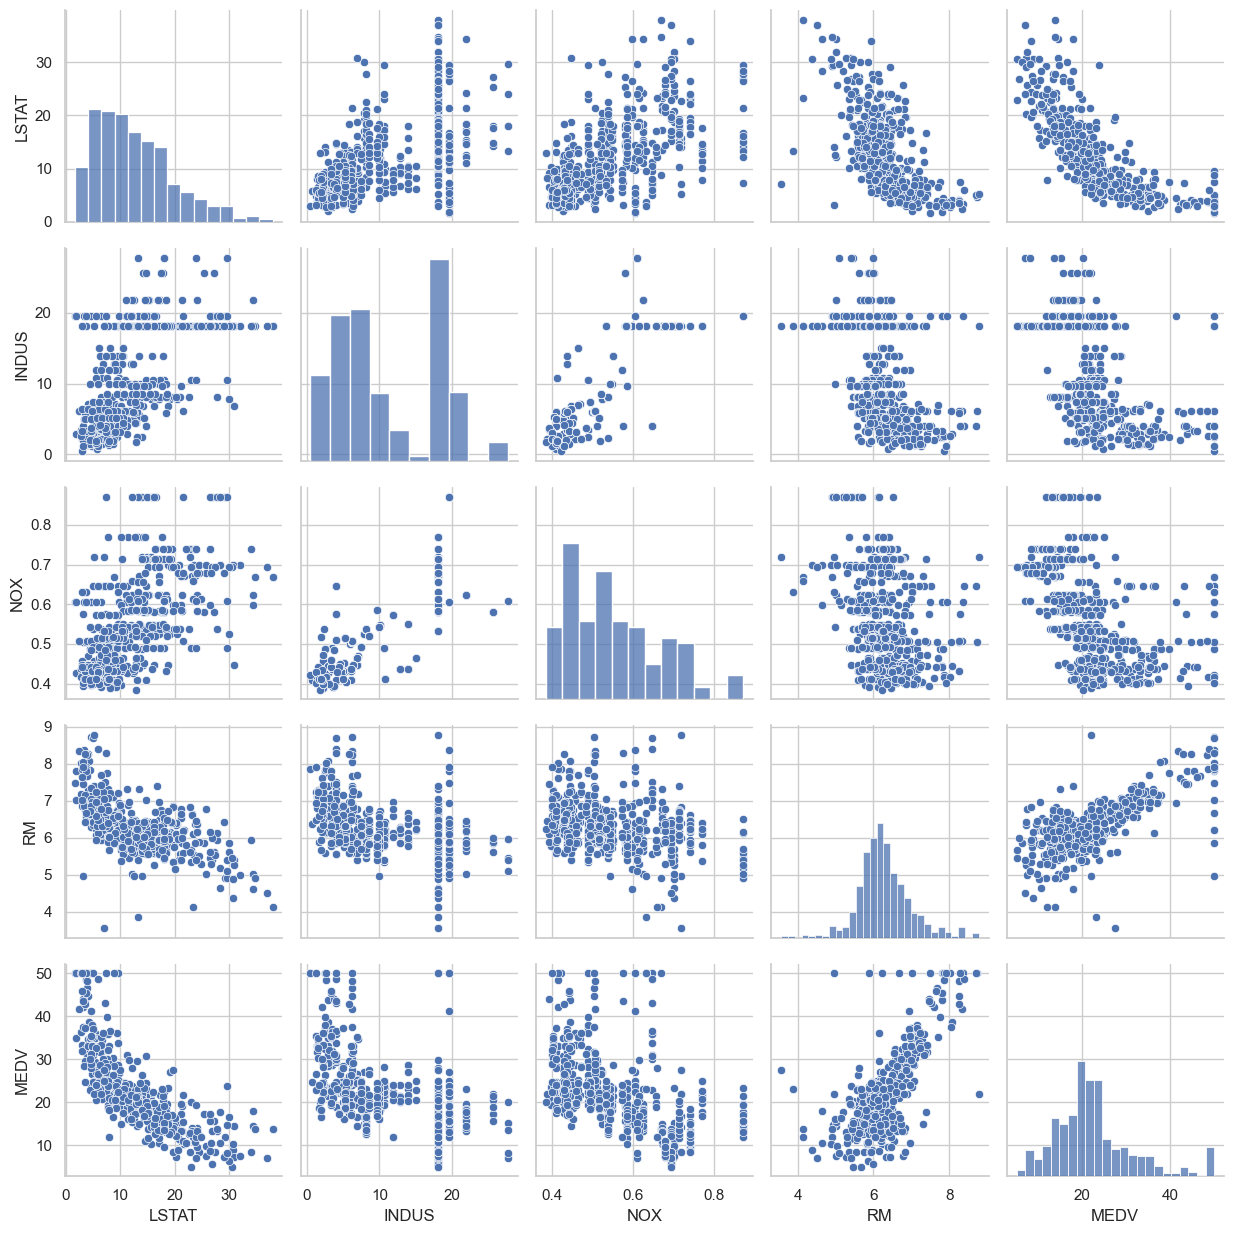

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

#set the style for the plot
sns.set(style='whitegrid',context='notebook')

#consider these columns only
cols=(['LSTAT','INDUS','NOX','RM','MEDV'])

#display the pairplot using the above mentioned colums
sns.pairplot(df[cols],height=2.5)

plt.tight_layout()
plt.show()

### Heatmap

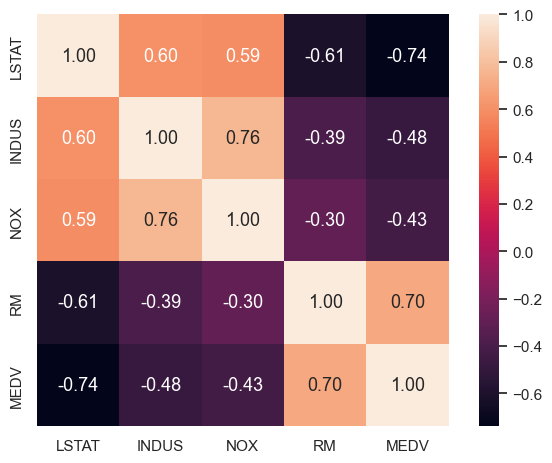

In [23]:
import numpy as np

#initialise an object uning np
cm = np.corrcoef(df[cols].values.T)

#set the front size of the plot
#sns.set(font_scale = 1)

hm= sns.heatmap(cm,
               cbar=True,
               annot=True,
               square=True,
               fmt='.2f',
               annot_kws={'size':13},
               yticklabels=cols,
               xticklabels=cols)
plt.tight_layout()
plt.show()

## Linear Regression Model

In [38]:
# Class setup
class LinearRegression(object):

    def __init__(self, eta = 0.001, n_iter=30):
        self.eta = eta             #eta is the learning rate
        self.n_iter= n_iter        # n_inter is the number of epochs through the training data

# Fit Method (training the model)   
    def fit(self, X,y):
        self.w_ = np.zeros(1 + X.shape[1])  # self.w are the weights.
                                            # X.shape[1] = number of features(columns)
                                            # the extra 1 is for the bias term
        self.cost_ = []                     # self.cost_ will keep track of the error at each iteration

        for i in range(self.n_iter):
            output = self.net_input(X)     #output = model's current predictions
            errors = (y - output)          #errors = difference between actual values and predicted
            self.w_[1:] += self.eta * X.T.dot(errors) #the feature weights gets updated by the dot product of errors and features, scaled by eta
            self.w_[0] += self.eta * errors.sum() #the bias is updated separately using the sum of errors
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

# Net input
#this computes the liear combination of features and weights = bias
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

# Predict
    def predict(self, X):
        return self.net_input(X)

In [26]:
X = df[['RM']].values
y = df[['MEDV']].values

In [27]:
X.shape,y.shape

((506, 1), (506, 1))

### Normalization

In [30]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()

#train the objects using fit_transform()
X_std = sc.fit_transform(X)
y_std = sc.fit_transform(y)

In [31]:
# reshape (506, 1) to (506)
y_std = np.reshape(y_std, 506)

y_std.shape

(506,)

### Train the model

In [39]:
# initialise an object (lr) usisn the created function
lr = LinearRegression()

# Train the model
lr.fit(X_std, y_std)

### Plot of Linear Regression Iterations and Cost

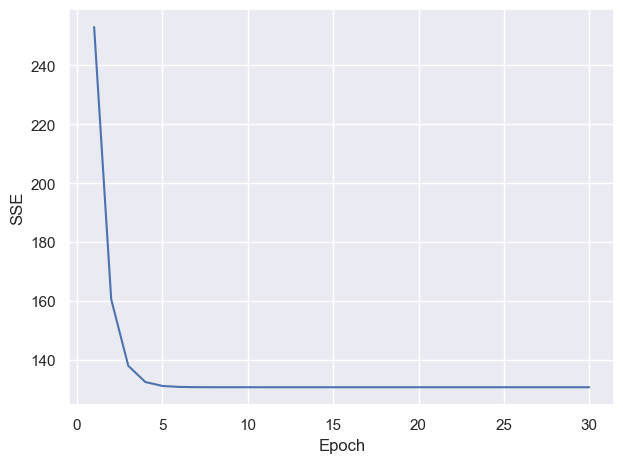

In [40]:
# Plot of linear regression iterations and cost

plt.plot(range(1, lr.n_iter + 1),lr.cost_)
plt.ylabel('SSE') #SSE = sum of squares error
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()

### Plot of Linear Regression

In [41]:
#Function for linear regression plot
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red', linewidth =2)
    return

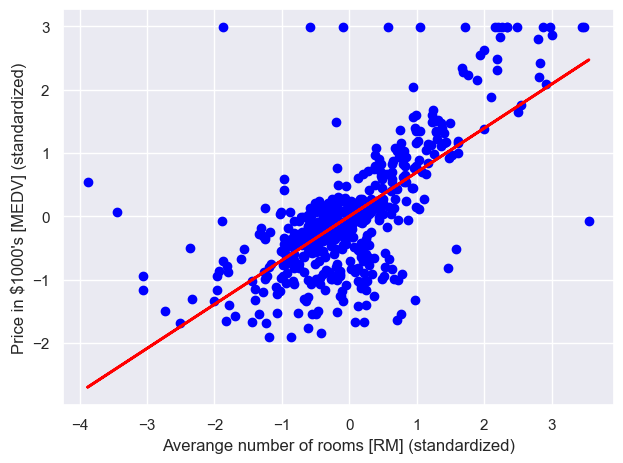

In [42]:
#call the funtion lin_regplot()

lin_regplot(X_std, y_std, lr)
plt.xlabel('Averange number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.tight_layout()
plt.show()

In [43]:
# display slope(m) and the intercept(b) of the line
print('Slope: %3.f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope:   1
Intercept: -0.000


### Predict

predict the price of a 5 rooms house

In [49]:
# transform the price of a number of the rooms
num_rooms_std = sc.transform([[5.0]])

#predicted price based on the number of rooms
price_std = lr.predict(num_rooms_std)

#reshape the price_std array to be 2D
price_std_2d = price_std.reshape(-1,1)

# display the predicted price
print("Price in $1000's: %f" % sc.inverse_transform(price_std_2d))

Price in $1000's: 10.341195
